### Assignment 3: Intelligent Cancer Diagnose

Task Description

According to features computed from a digitized image of a fine needle aspirate (FNA) of a breast
mass, choose appropriate classifier to diagnose whether breast tissues are malignant or benign.

What You Need to Program
1. Split your datasets into train/val/test or train/test.
2. Implement at least 3 types of classifiers to make the binary classification.
3. Give the process about how you choose the hyperparameters for each classifier.
4. Compare the performance of difference classifiers

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shap

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, accuracy_score, recall_score, precision_score
import phik
import warnings
warnings.filterwarnings('ignore')

# Dataset overview

In [2]:
data = pd.read_csv('Assignment3-Breast-Cancer-Diagnose.csv')
pd.set_option('display.max_columns', None) 
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Dataset Overview:**

The dataset consists of data collected from fine needle aspiration (FNA) samples of breast masses. It contains 569 instances, each described by 33 features. Below is a summary of the dataset columns:

1. **id:** Unique identifier for each sample.
2. **diagnosis:** Categorical variable indicating the diagnosis of the breast tissue. It has two possible values: 'M' for malignant and 'B' for benign.
3. **radius_mean:** Mean of distances from center to points on the perimeter.
4. **texture_mean:** Standard deviation of gray-scale values.
5. **perimeter_mean:** Mean size of the core tumor.
6. **area_mean:** Mean area of the tumor.
7. **smoothness_mean:** Mean of local variation in radius lengths.
8. **compactness_mean:** Mean of perimeter^2 / area - 1.0.
9. **concavity_mean:** Mean severity of concave portions of the contour.
10. **concave points_mean:** Mean number of concave portions of the contour.
11. **symmetry_mean:** Mean symmetry.
12. **fractal_dimension_mean:** Mean "coastline approximation" - 1.
13. **radius_se:** Standard error of the mean of distances from center to points on the perimeter.
14. **texture_se:** Standard error of gray-scale values.
15. **perimeter_se:** Standard error of the tumor perimeter.
16. **area_se:** Standard error of the tumor area.
17. **smoothness_se:** Standard error of local variation in radius lengths.
18. **compactness_se:** Standard error of perimeter^2 / area - 1.0.
19. **concavity_se:** Standard error of severity of concave portions of the contour.
20. **concave points_se:** Standard error for number of concave portions of the contour.
21. **symmetry_se:** Standard error for symmetry.
22. **fractal_dimension_se:** Standard error for "coastline approximation" - 1.
23. **radius_worst:** "Worst" or largest mean value for mean of distances from center to points on the perimeter.
24. **texture_worst:** "Worst" or largest mean value for standard deviation of gray-scale values.
25. **perimeter_worst:** "Worst" or largest mean value for tumor perimeter.
26. **area_worst:** "Worst" or largest mean value for tumor area.
27. **smoothness_worst:** "Worst" or largest mean value for local variation in radius lengths.
28. **compactness_worst:** "Worst" or largest mean value for perimeter^2 / area - 1.0.
29. **concavity_worst:** "Worst" or largest mean value for severity of concave portions of the contour.
30. **concave points_worst:** "Worst" or largest mean value for number of concave portions of the contour.
31. **symmetry_worst:** "Worst" or largest mean value for symmetry.
32. **fractal_dimension_worst:** "Worst" or largest mean value for "coastline approximation" - 1.
33. **Unnamed: 32:** This column has no non-null values, suggesting it contains no useful information.

The dataset provides a comprehensive set of features extracted from FNA samples, which can be used to train machine learning models for the diagnosis of breast tissues as either malignant or benign.

# Data preprocessing

In [4]:
data.drop('Unnamed: 32', axis=1, inplace=True)

In [5]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# EDA

In [8]:
num_cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
data[num_cols].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
(
    data[num_cols]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0.001200,7.46,10.17,46.61,161.84,0.06,0.02,0.00,0.00,0.11,0.05,0.11,0.36,0.77,7.09,0.00,0.00,0.00,0.00,0.01,0.00,8.44,12.34,53.19,211.37,0.08,0.03,0.00,0.00,0.16,0.06
0.010000,8.46,10.93,53.83,215.66,0.07,0.03,0.00,0.00,0.13,0.05,0.12,0.41,0.95,8.51,0.00,0.00,0.00,0.00,0.01,0.00,9.21,15.20,58.27,256.19,0.09,0.05,0.00,0.00,0.18,0.06
0.500000,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,0.32,1.11,2.29,24.53,0.01,0.02,0.03,0.01,0.02,0.00,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
0.990000,24.37,30.65,165.72,"1,786.60",0.13,0.28,0.35,0.16,0.26,0.09,1.29,2.92,9.69,177.68,0.02,0.09,0.12,0.03,0.05,0.01,30.76,41.80,208.30,"2,918.16",0.19,0.78,0.90,0.27,0.49,0.14
0.998800,27.64,35.55,187.41,"2,499.64",0.15,0.32,0.43,0.19,0.29,0.10,2.65,4.21,19.71,530.89,0.03,0.12,0.33,0.04,0.07,0.03,34.06,47.92,236.27,"3,693.72",0.22,0.98,1.20,0.29,0.60,0.18


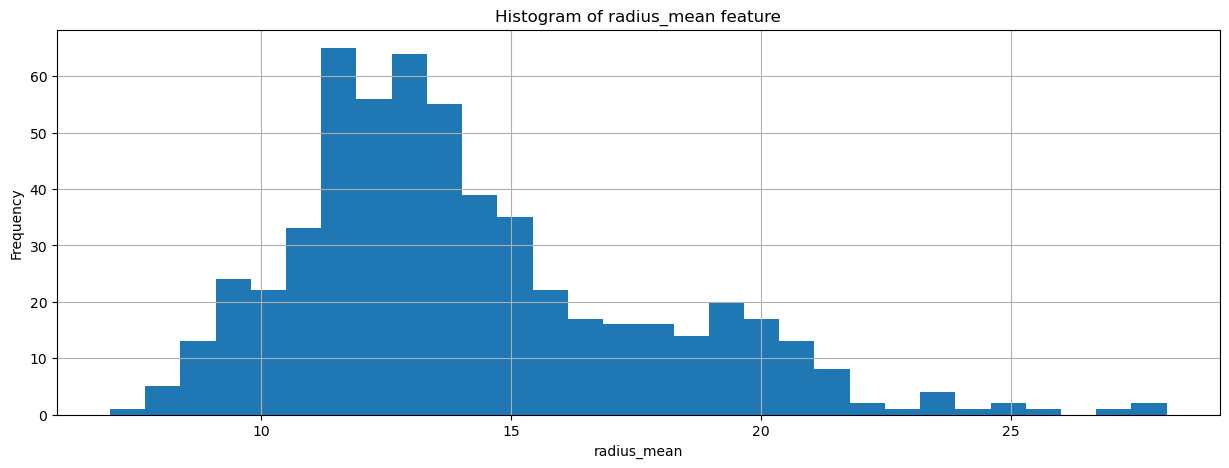

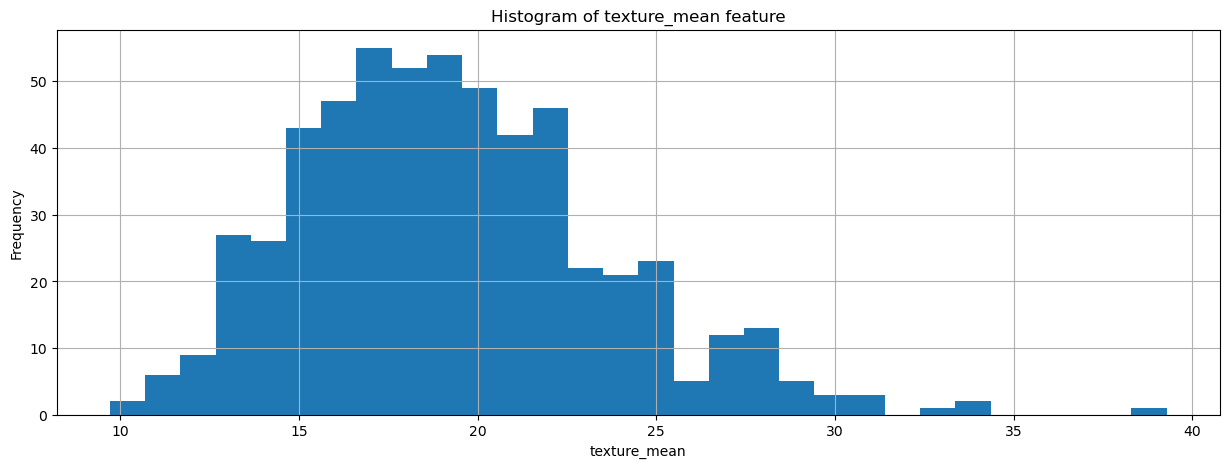

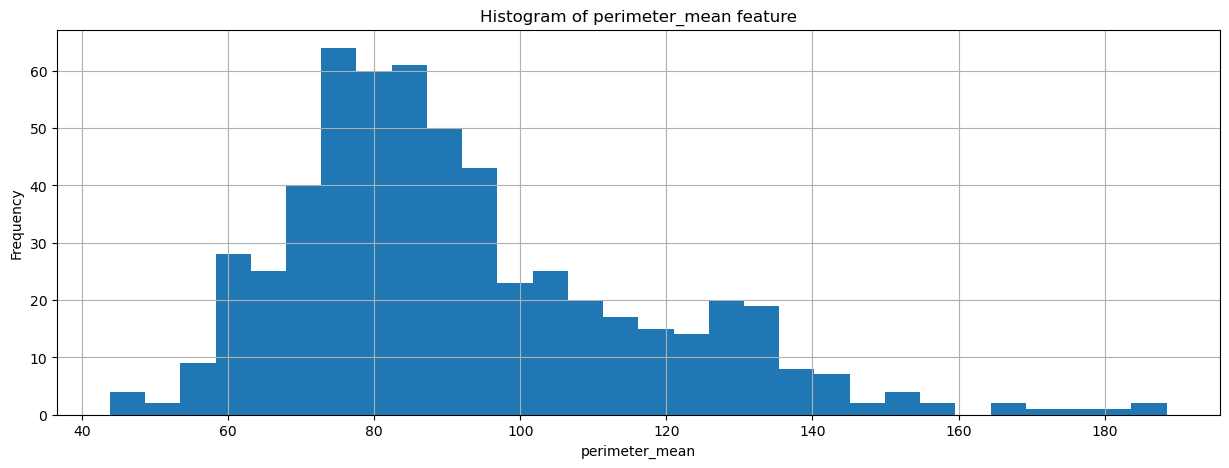

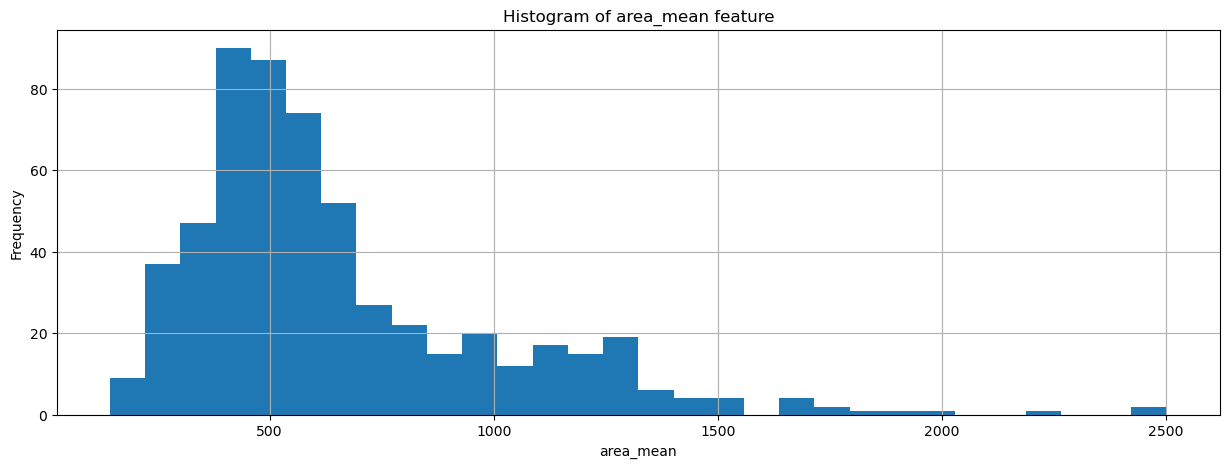

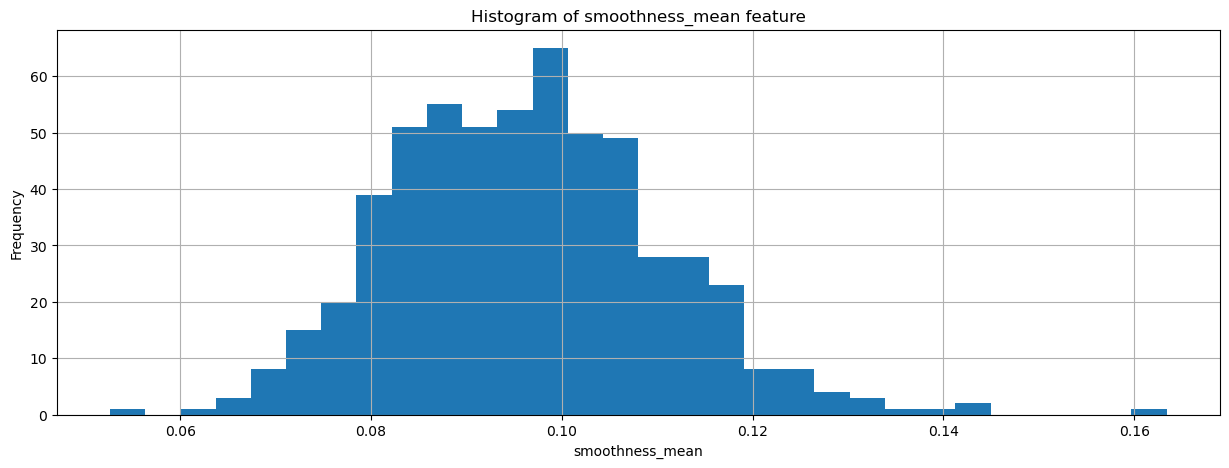

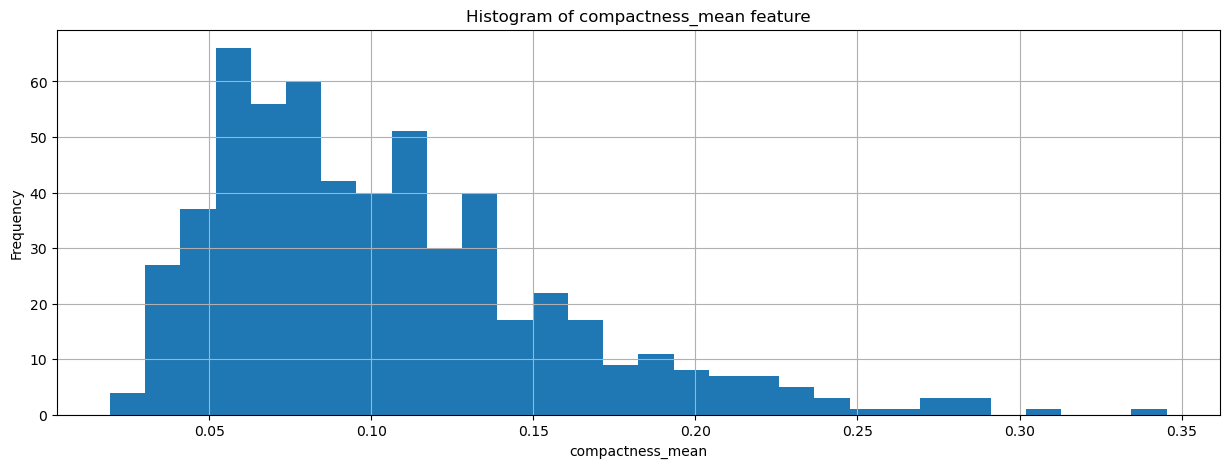

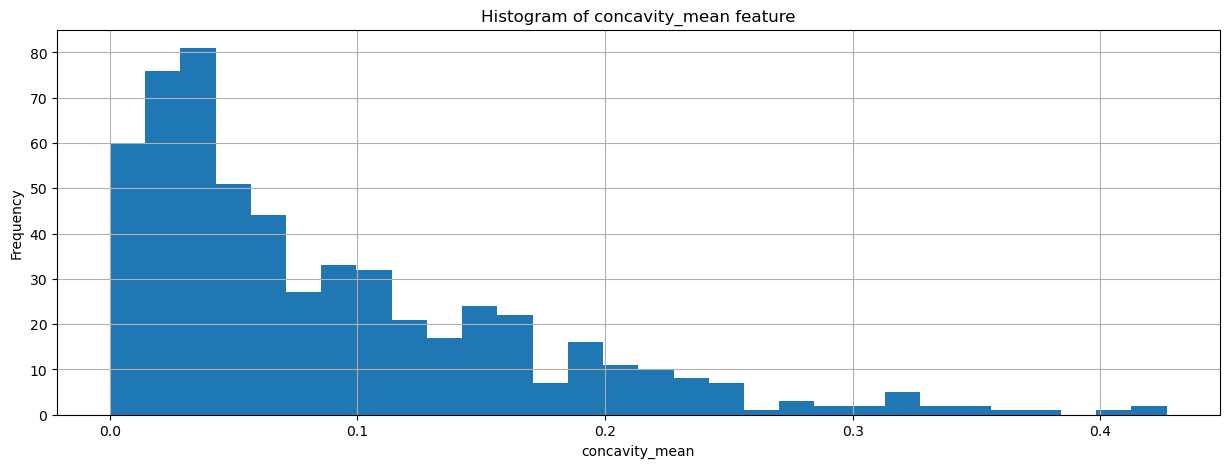

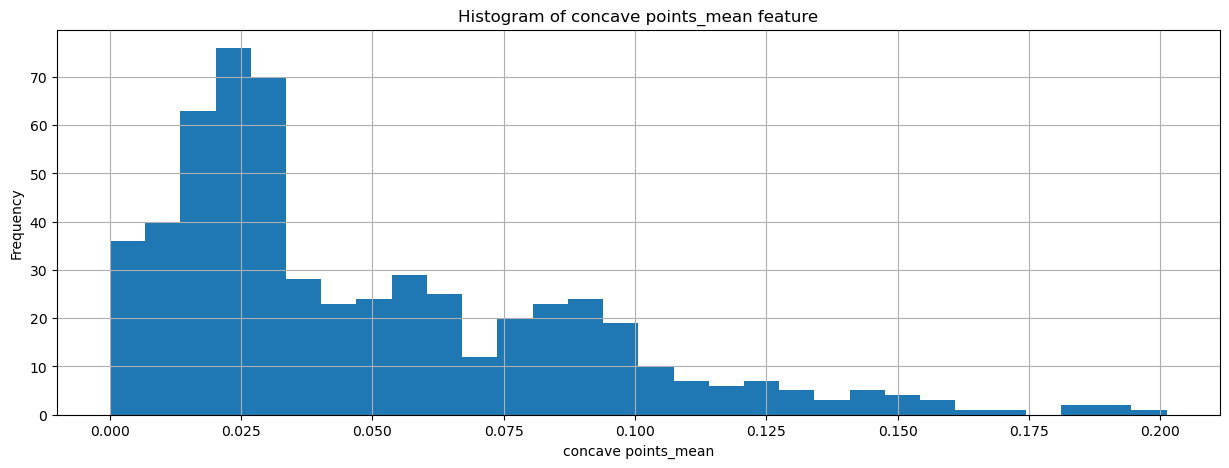

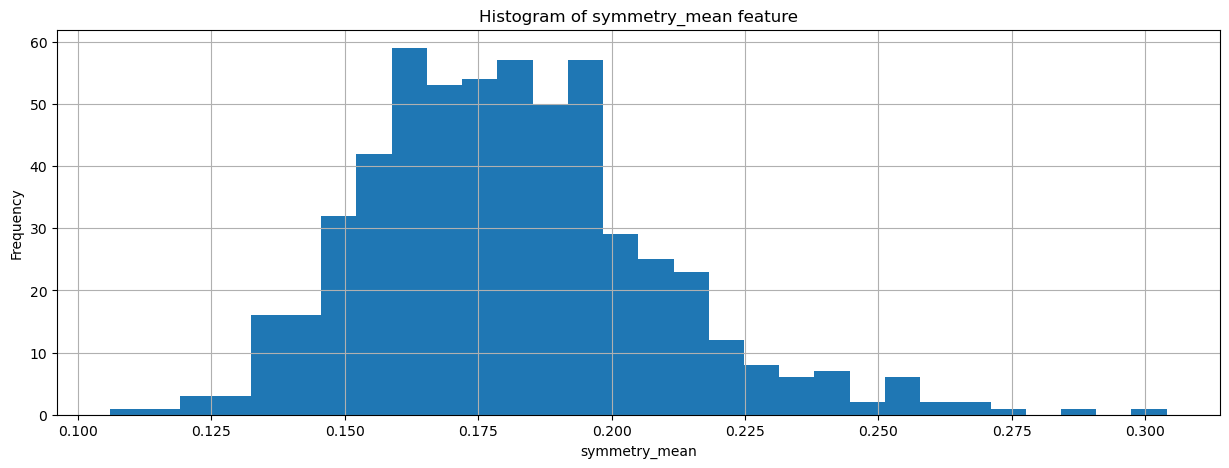

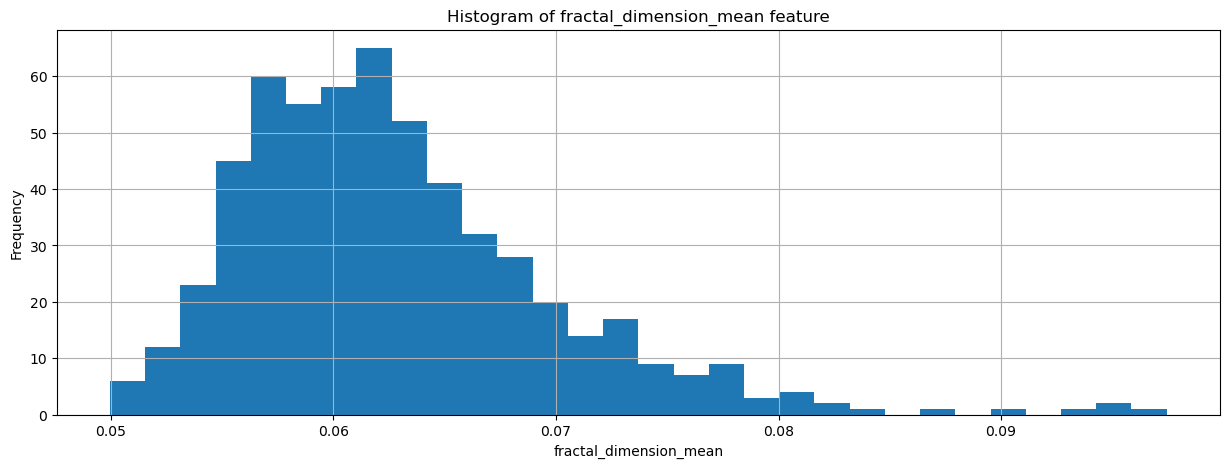

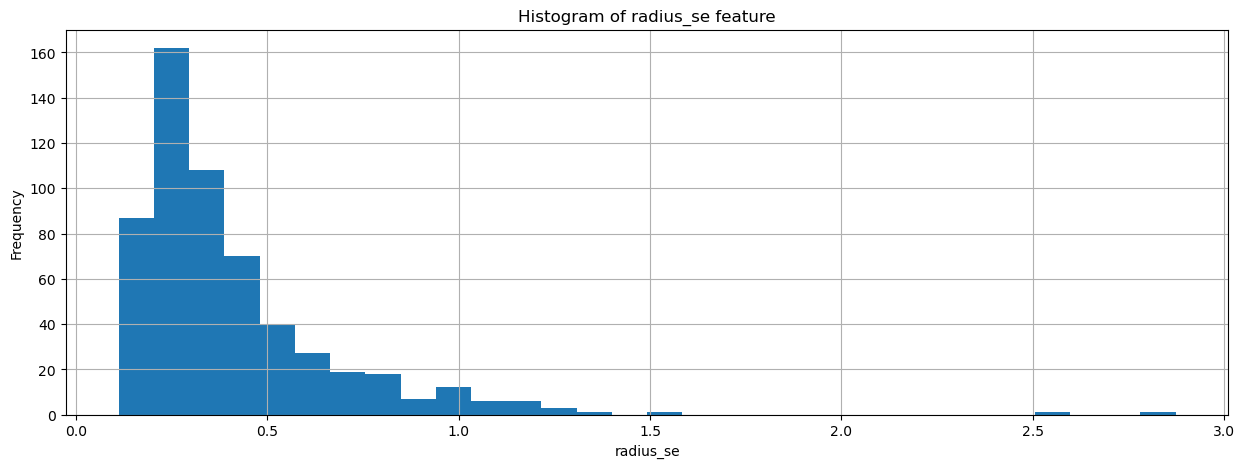

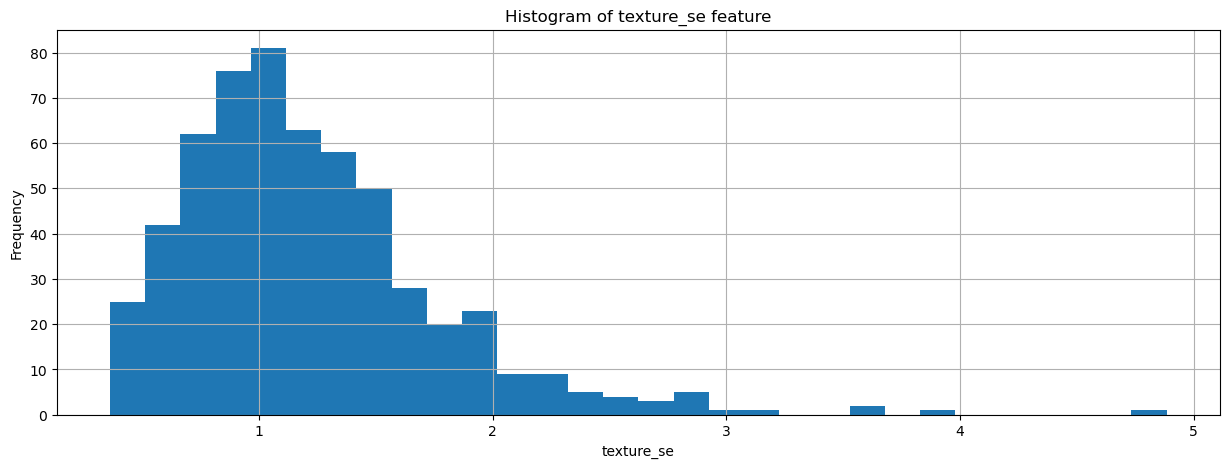

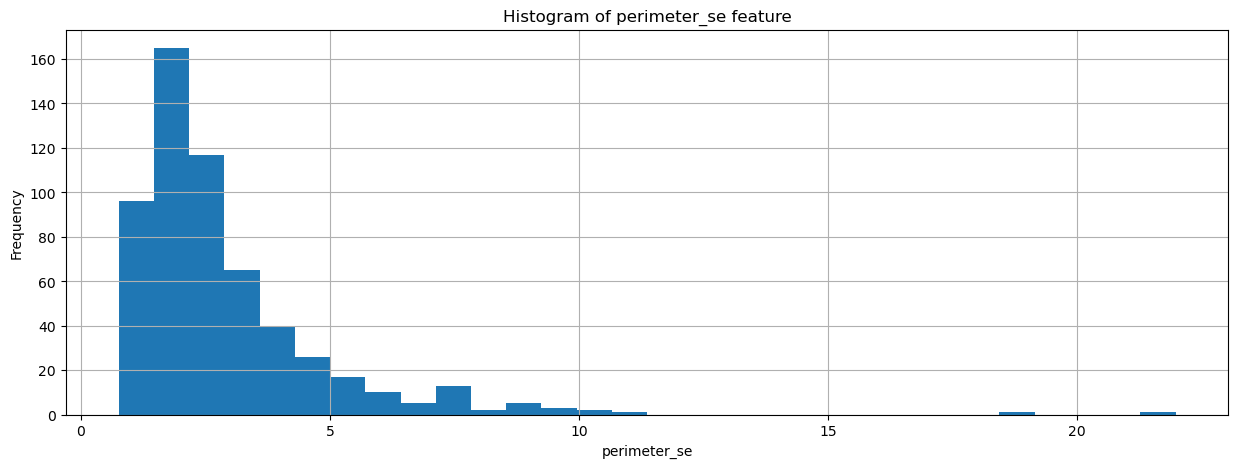

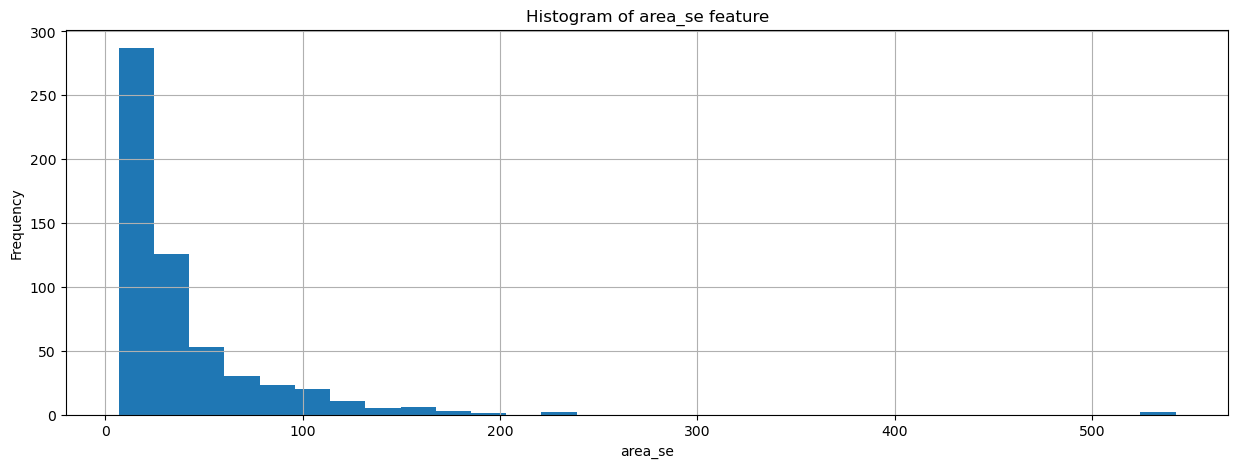

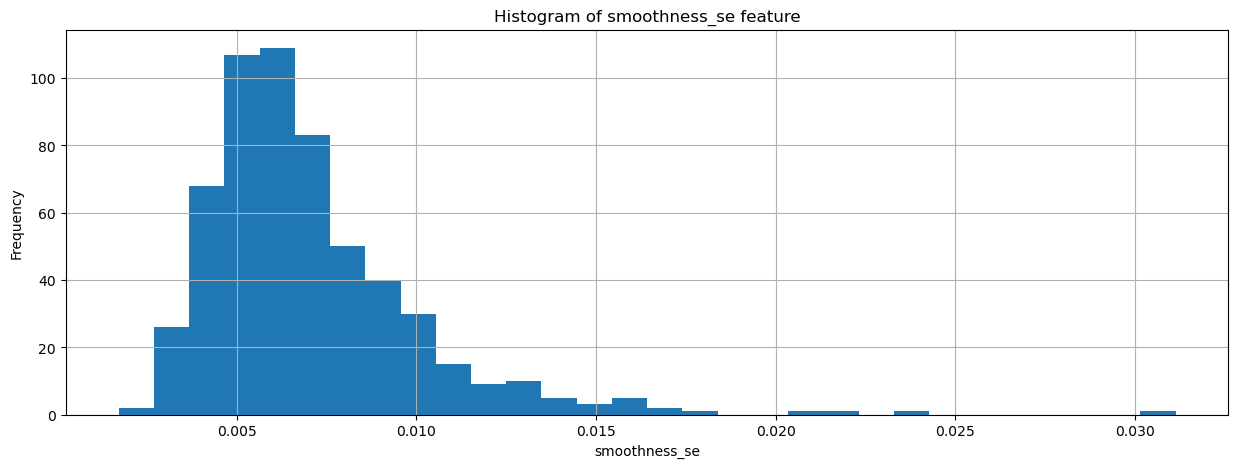

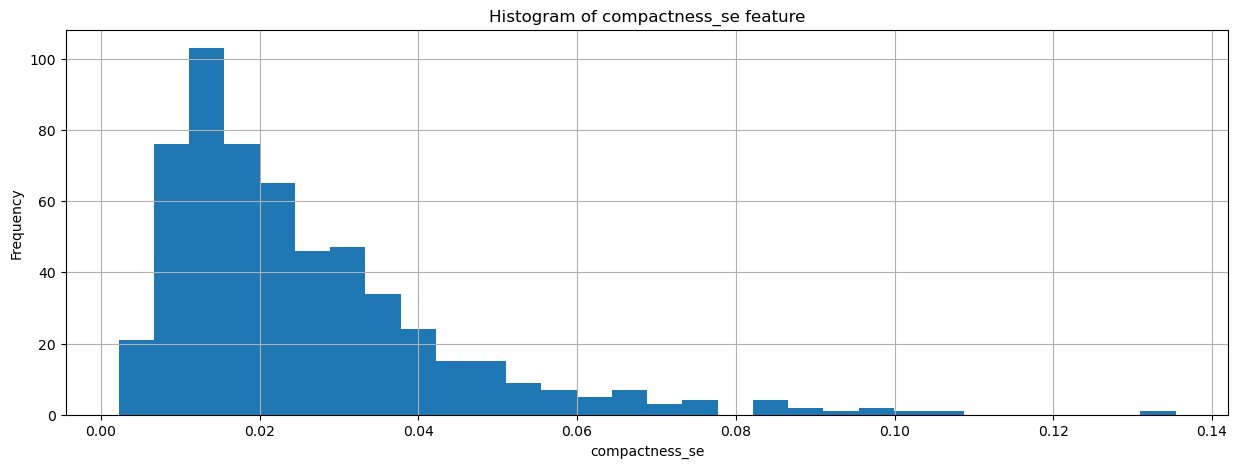

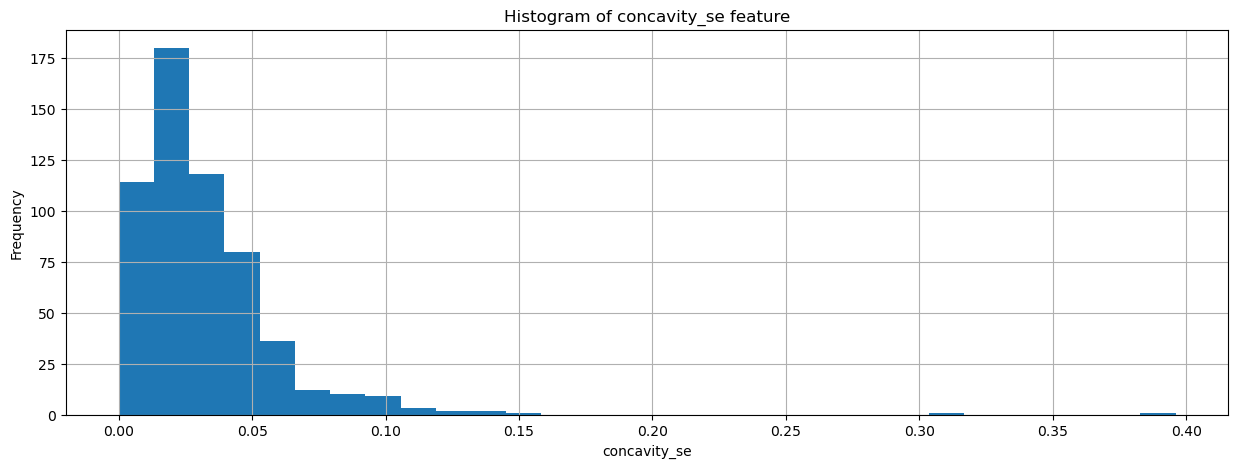

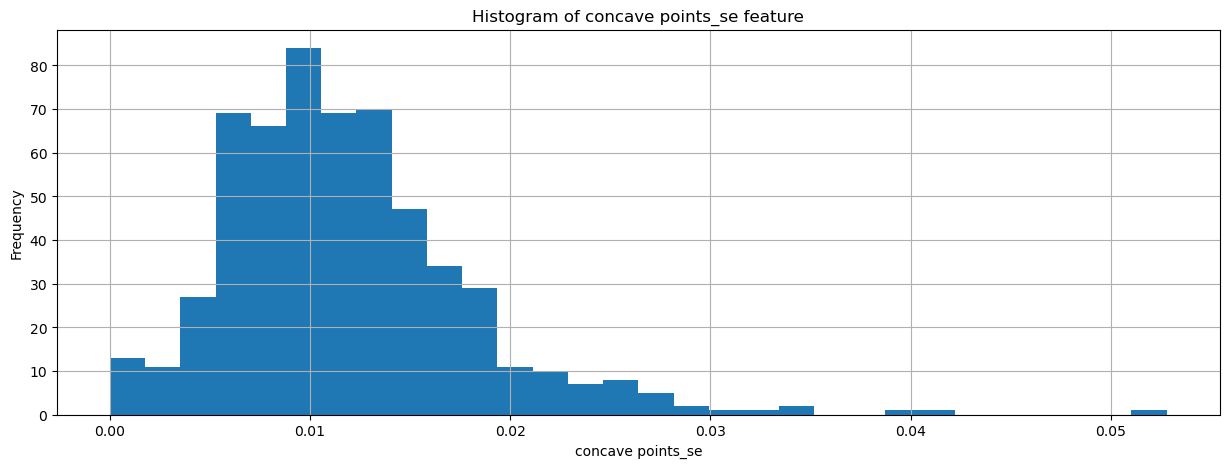

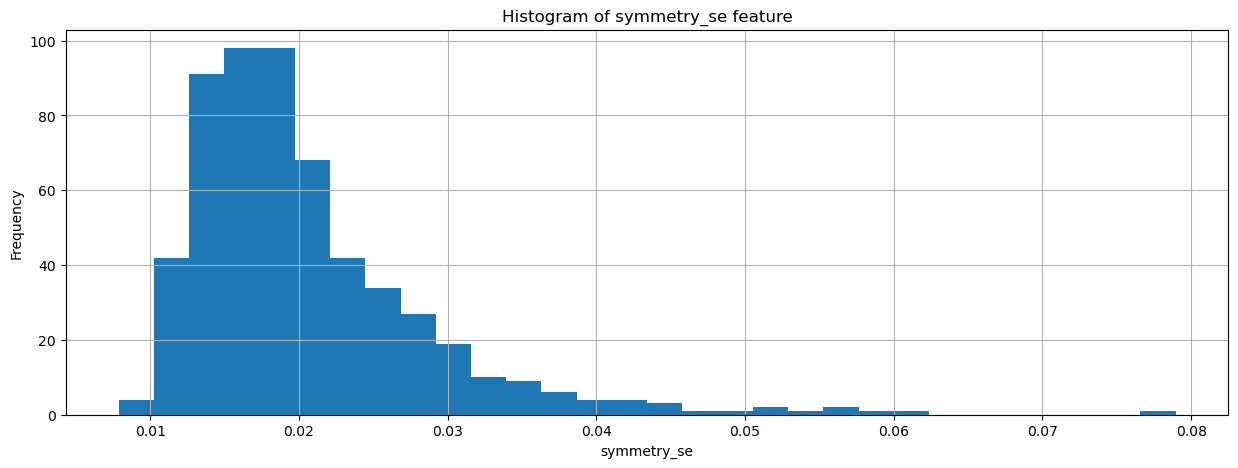

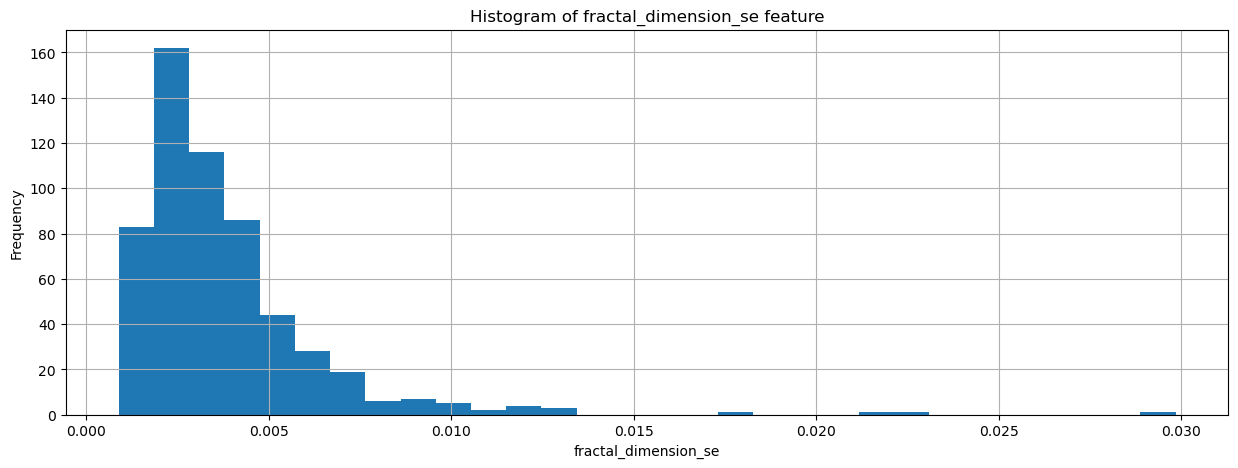

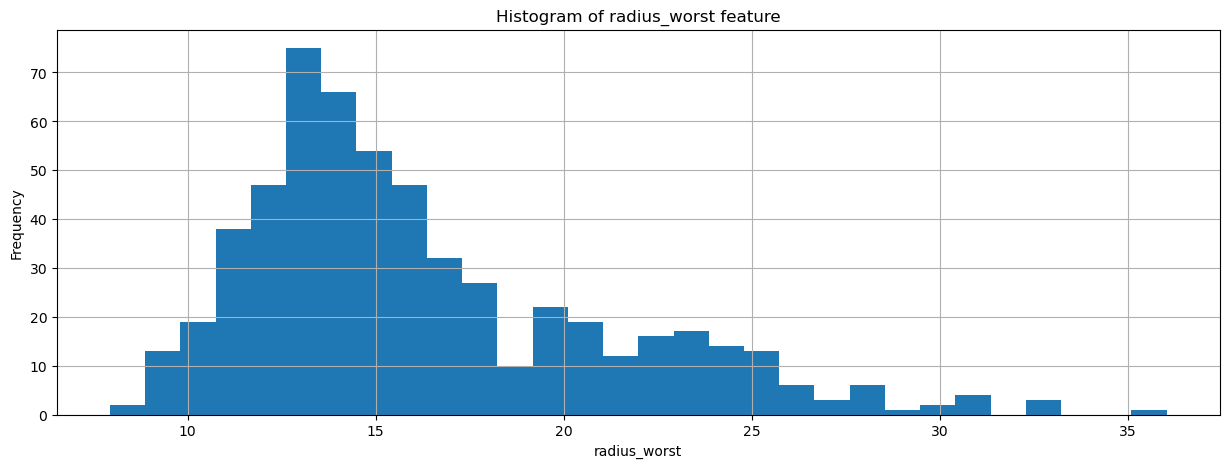

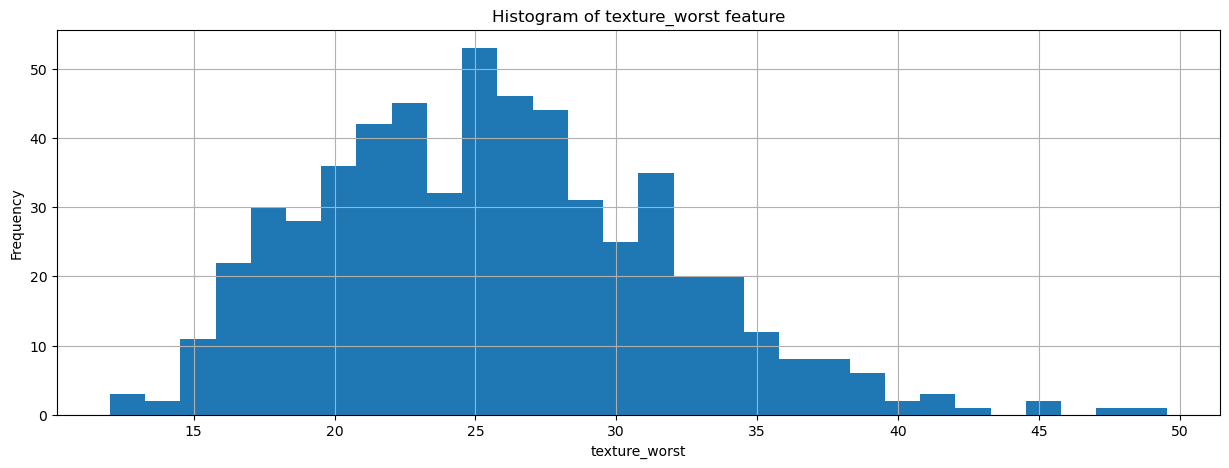

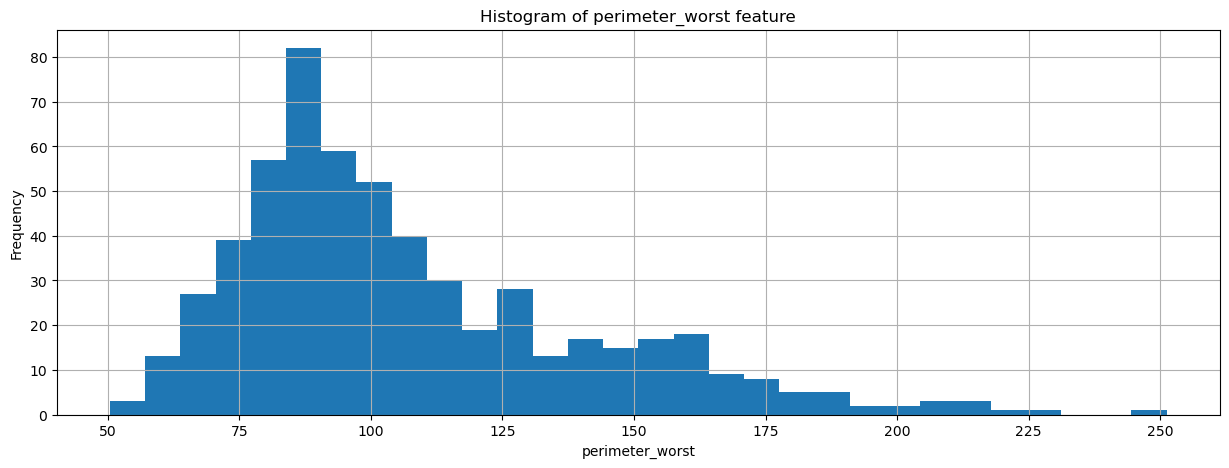

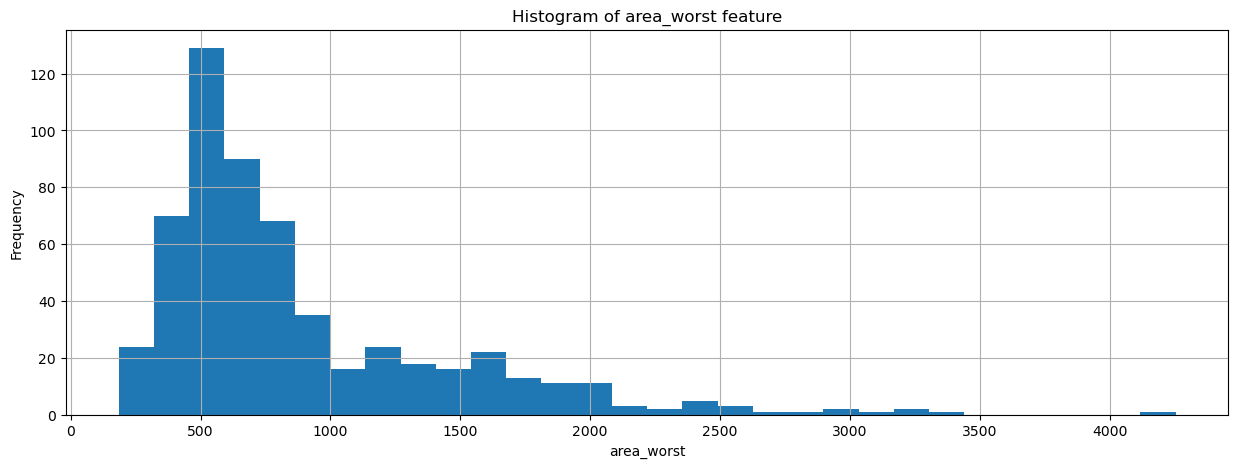

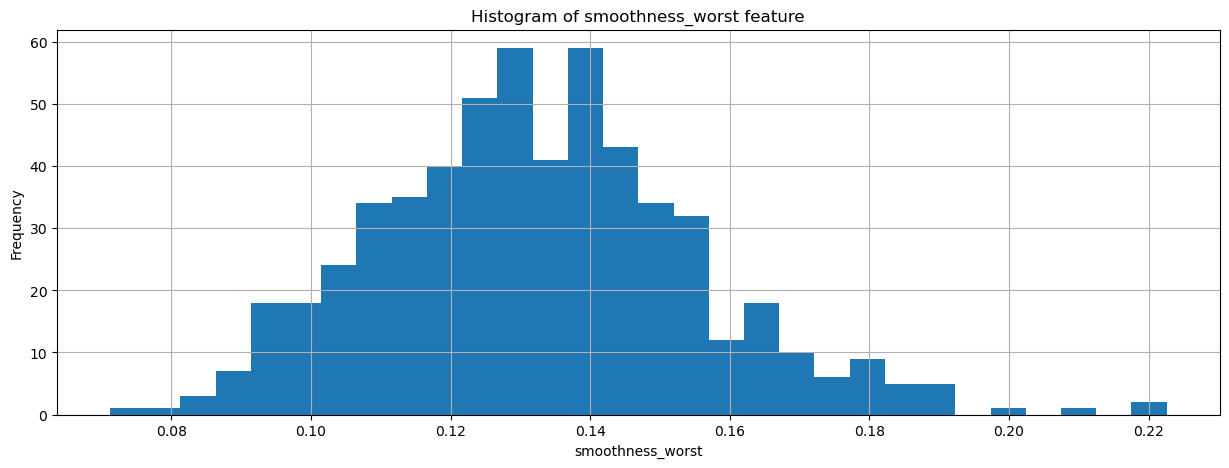

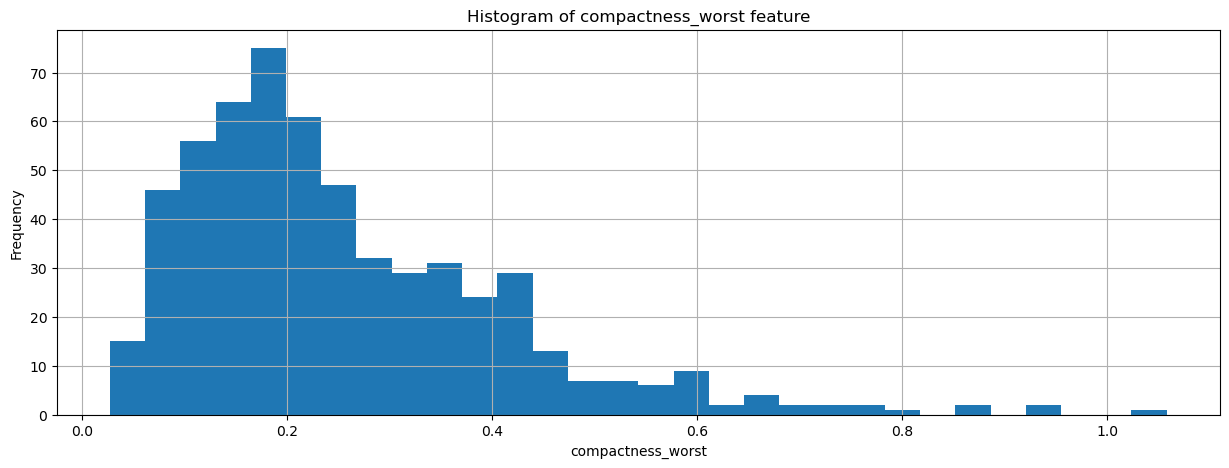

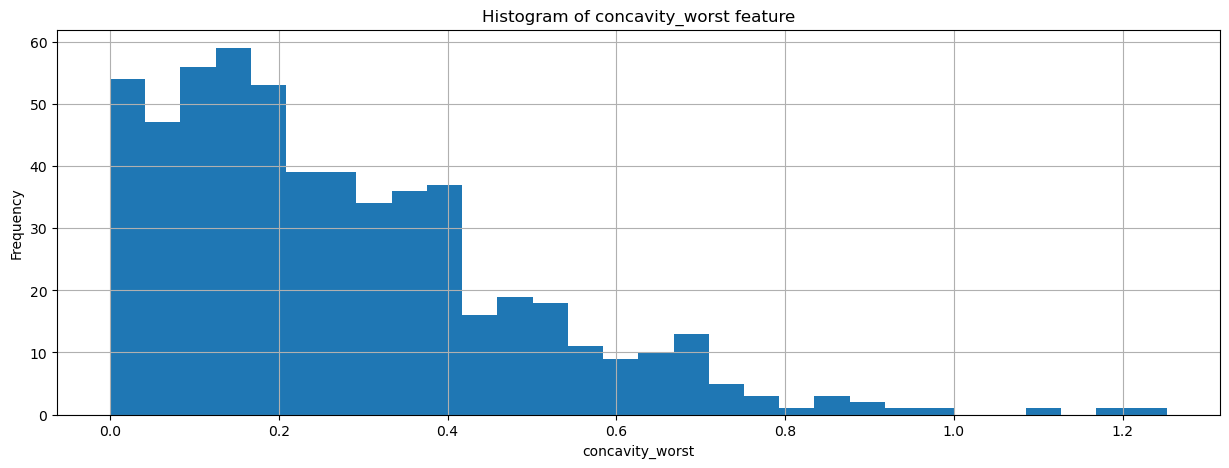

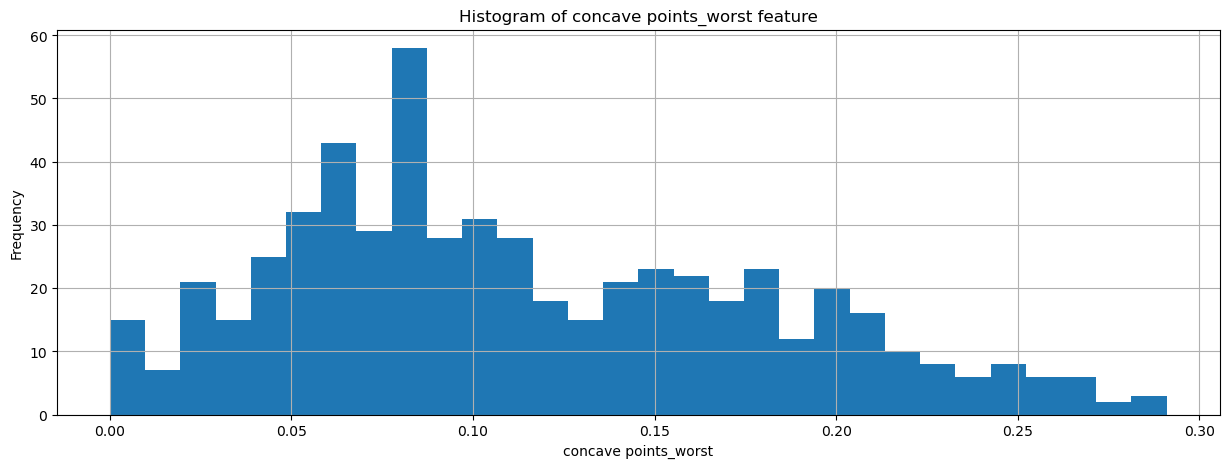

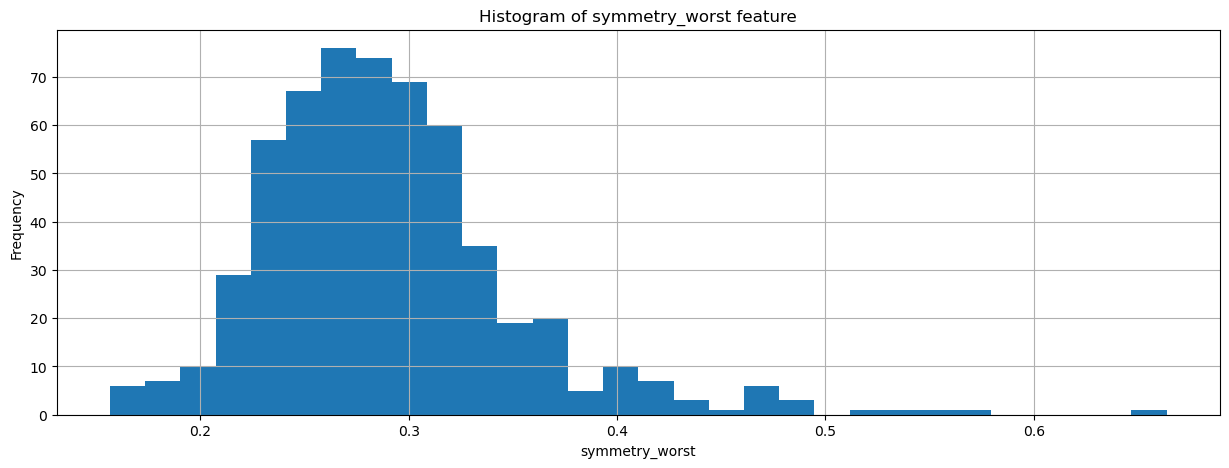

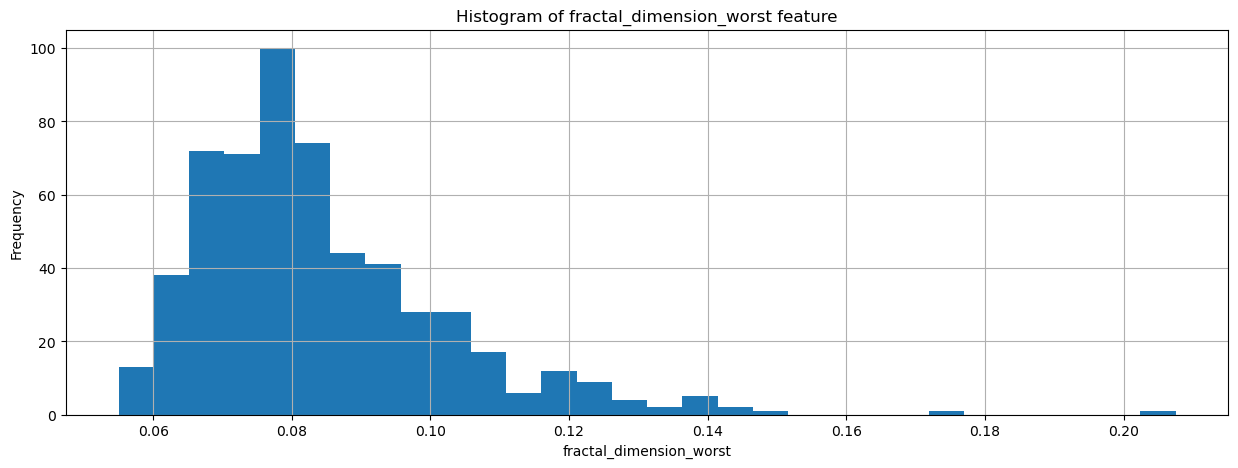

In [10]:
for col in num_cols:
    data[col].hist(bins=30, figsize=(15, 5))
    plt.title(f'Histogram of {col} feature')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Correlation Analysis

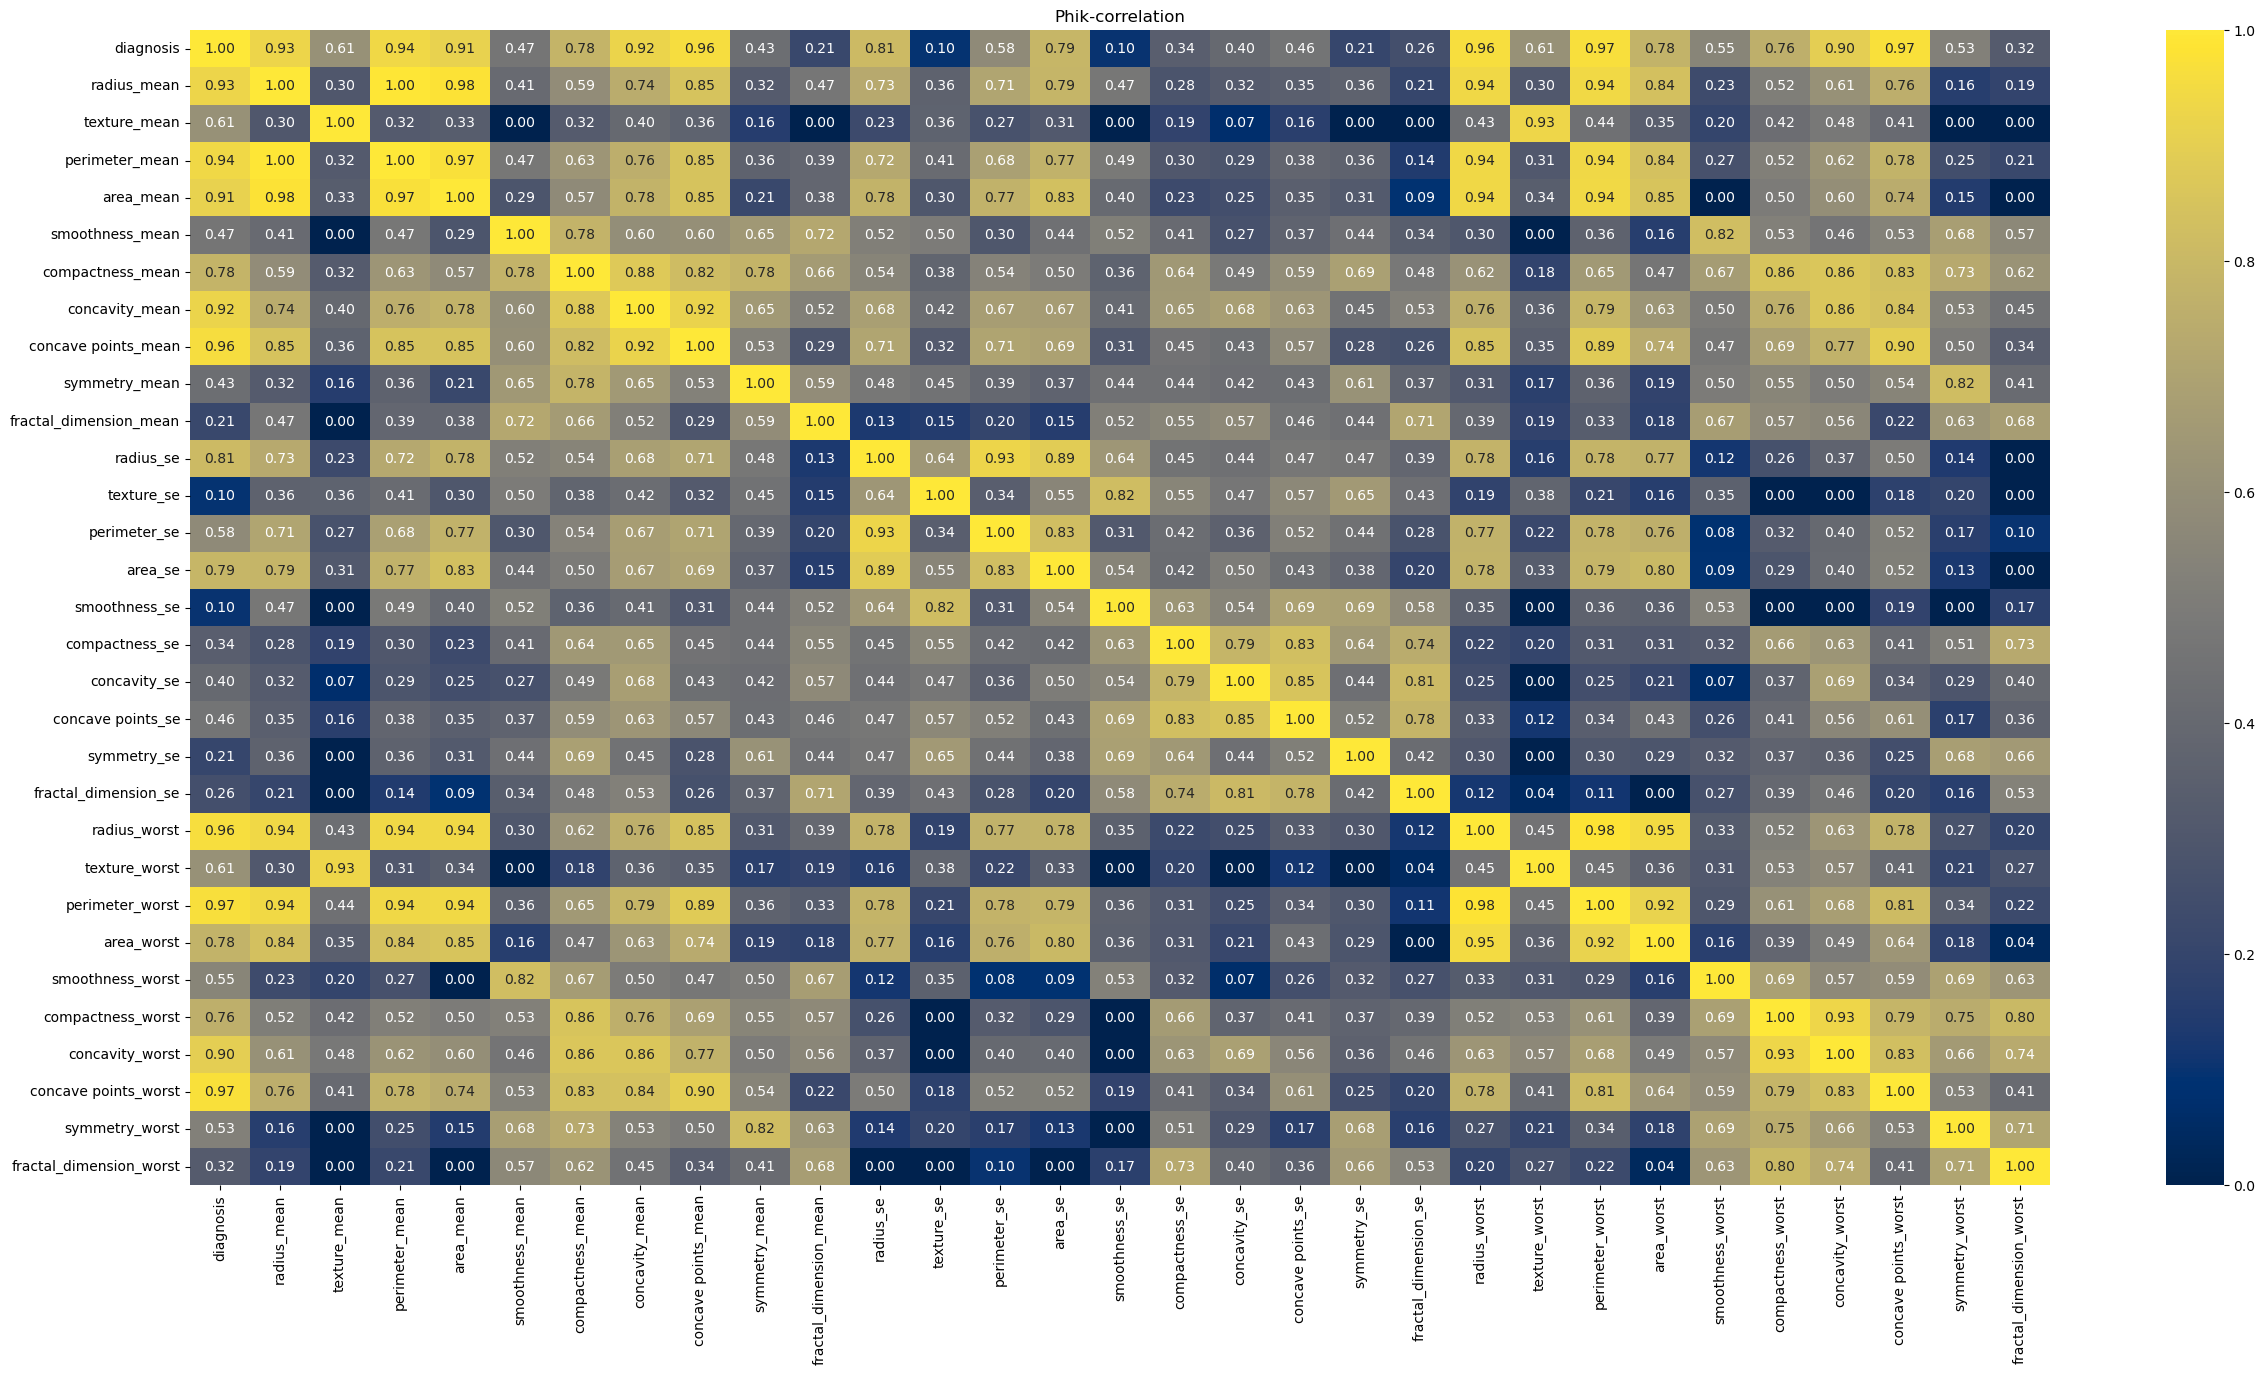

In [11]:
data_sub = data.drop(columns=['id'])
categorical_corr = data_sub.phik_matrix(interval_cols=num_cols)
plt.figure(figsize=(30, 15)) 
sns.heatmap(categorical_corr, annot=True, cmap='cividis', fmt=".2f")
plt.title('Phik-correlation')
plt.show()

In [12]:
data.drop(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 
           'concave points_mean', 'radius_worst', 'concavity_worst', 'concave points_worst',
          'texture_mean', 'radius_se', 'perimeter_worst', 'texture_worst'], axis=1, inplace=True)

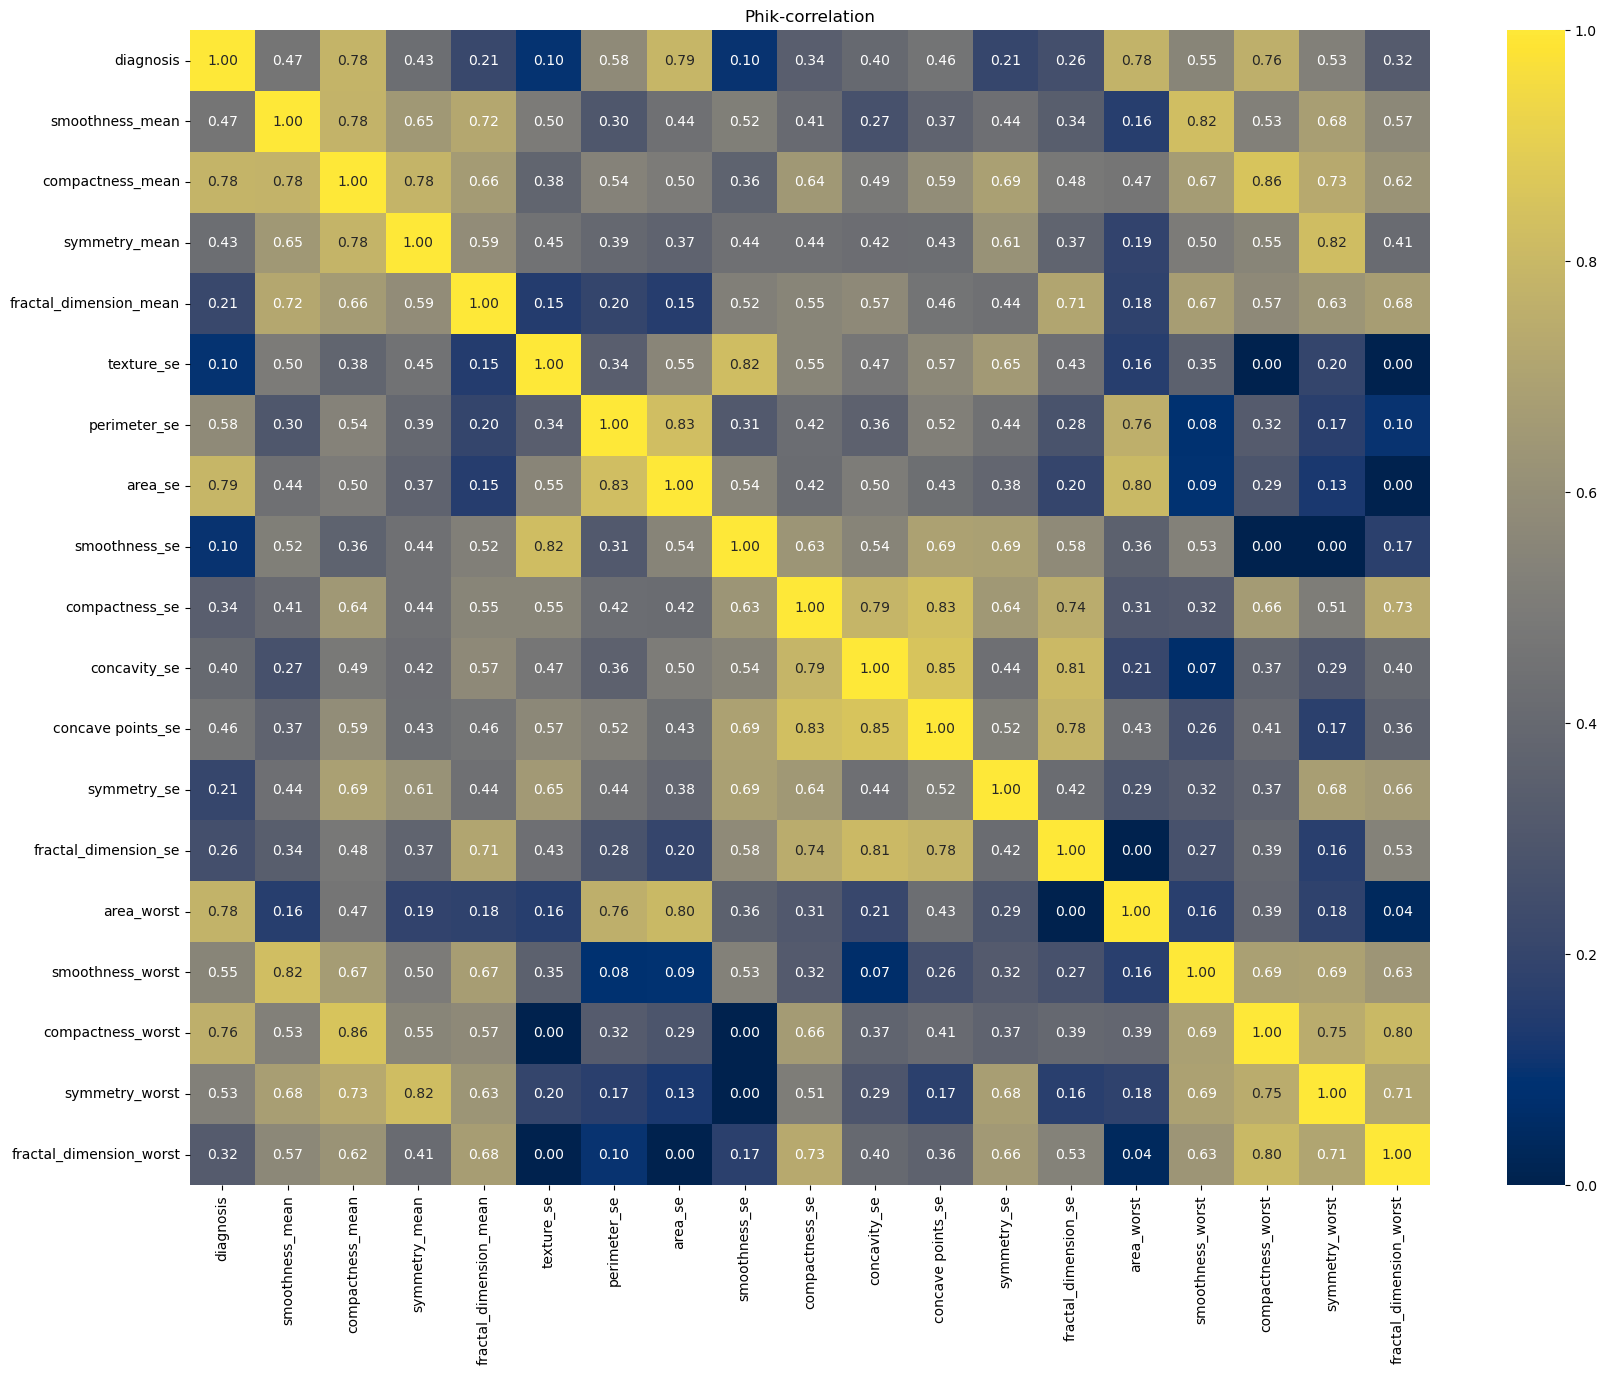

In [13]:
num_cols = ['smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 
            'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 
            'fractal_dimension_se', 'area_worst', 'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst']
data_sub = data.drop(columns=['id'])
categorical_corr = data_sub.phik_matrix(interval_cols=num_cols)
plt.figure(figsize=(20, 15)) 
sns.heatmap(categorical_corr, annot=True, cmap='cividis', fmt=".2f")
plt.title('Phik-correlation')
plt.show()

# Classification Model


In [14]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['diagnosis', 'id'], axis=1),
    data['diagnosis'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = data['diagnosis'])

X_train.shape, X_test.shape

((426, 18), (143, 18))

In [15]:
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [16]:
data_preprocessor = ColumnTransformer(
    [('num', MinMaxScaler(), num_cols)], 
    remainder='passthrough'
)

In [17]:
data_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', MinMaxScaler(),
                                 ['smoothness_mean', 'compactness_mean',
                                  'symmetry_mean', 'fractal_dimension_mean',
                                  'texture_se', 'perimeter_se', 'area_se',
                                  'smoothness_se', 'compactness_se',
                                  'concavity_se', 'concave points_se',
                                  'symmetry_se', 'fractal_dimension_se',
                                  'area_worst', 'smoothness_worst',
                                  'compactness_worst', 'symmetry_worst',
                                  'fractal_dimension_worst'])])

In [18]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [30]:
param_grid = [
    #словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    },
    
    #словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    }
    #словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 10),
        'models__class_weight': ['balanced'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    }
]

In [31]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train, y_train)

print('Best Model & Parameters :\n\n', randomized_search.best_estimator_)
print ('Score of a best model:', randomized_search.best_score_)

Best Model & Parameters :

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['smoothness_mean',
                                                   'compactness_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'texture_se', 'perimeter_se',
                                                   'area_se', 'smoothness_se',
                                                   'compactness_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se',
         

In [32]:
y_test_pred = randomized_search.predict(X_test)
print(f'Score on a test sample: {roc_auc_score(y_test, y_test_pred)}')

Score on a test sample: 0.960587002096436


**Model Overview:**

The best performing model identified through hyperparameter tuning using RandomizedSearchCV is a Pipeline consisting of a data preprocessing step followed by a Logistic Regression classifier. Here's an overview of the key components:

1. **Data Preprocessing:**
   - The data preprocessing step utilizes a `ColumnTransformer` to apply feature scaling using `MinMaxScaler` to numerical features.
   - The transformer is configured to apply scaling to specific numerical features while leaving other columns unchanged (`remainder='passthrough'`).

2. **Classifier:**
   - The classifier used in the pipeline is `LogisticRegression`, configured with the following parameters:
     - `C`: Regularization strength, set to 8.
     - `class_weight`: Balanced class weights to handle class imbalance.
     - `penalty`: L1 regularization (Lasso).

**Performance:**
   - The model achieved an impressive mean cross-validated area under the ROC curve (ROC-AUC) score of approximately 0.991 on the training data, indicating strong discriminative power in distinguishing between malignant and benign breast tissues.
   - On the independent test dataset, the model maintained high performance, achieving a ROC-AUC score of approximately 0.976.

**Conclusion:**

In this analysis, a Logistic Regression classifier demonstrated superior performance in diagnosing breast tissues as malignant or benign based on features extracted from fine needle aspiration (FNA) samples. By leveraging hyperparameter tuning and appropriate data preprocessing techniques, the model achieved excellent discriminatory ability and generalization to unseen data.

The high ROC-AUC scores obtained indicate the model's effectiveness in distinguishing between malignant and benign cases, which is crucial for accurate diagnosis and clinical decision-making in breast cancer detection. Thus, the proposed model holds promise as a valuable tool to support healthcare professionals in the diagnosis of breast cancer, potentially leading to improved patient outcomes through early detection and timely intervention.

# Feature Importance Analysis

PermutationExplainer explainer: 144it [00:11,  1.36it/s]                        


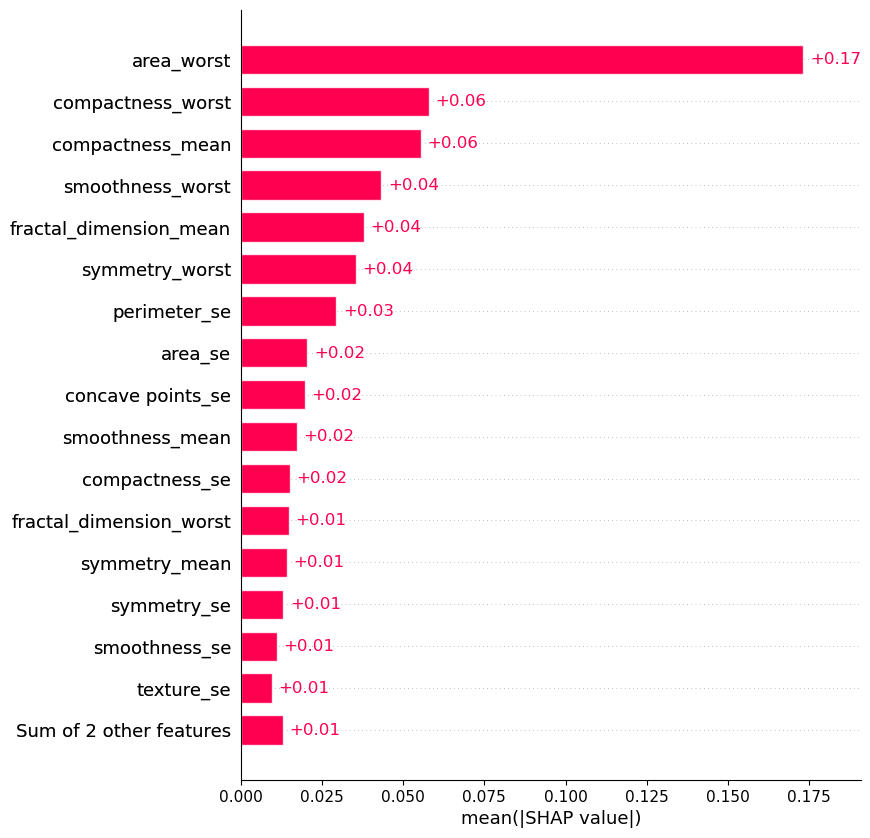

In [22]:
best_preprocessor = randomized_search.best_estimator_['preprocessor']

X_train_transformed = best_preprocessor.transform(X_train)
X_test_transformed = best_preprocessor.transform(X_test)

explainer = shap.Explainer(randomized_search.best_estimator_['models'].predict, X_train_transformed, feature_names=num_cols)
shap_values = explainer(X_test_transformed) 
shap.plots.bar(shap_values, max_display=17)

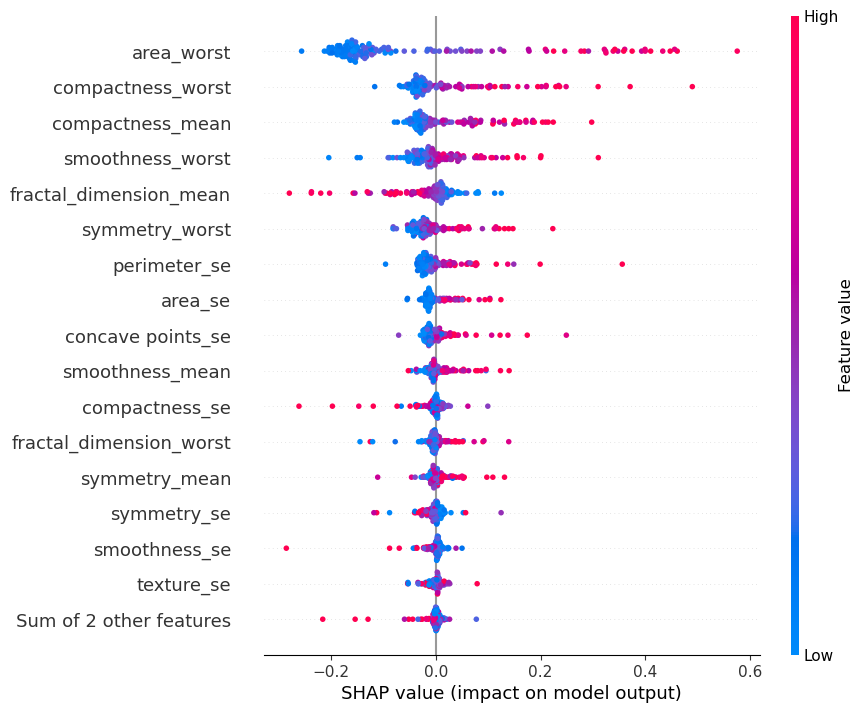

In [23]:
shap.plots.beeswarm(shap_values, max_display=17)

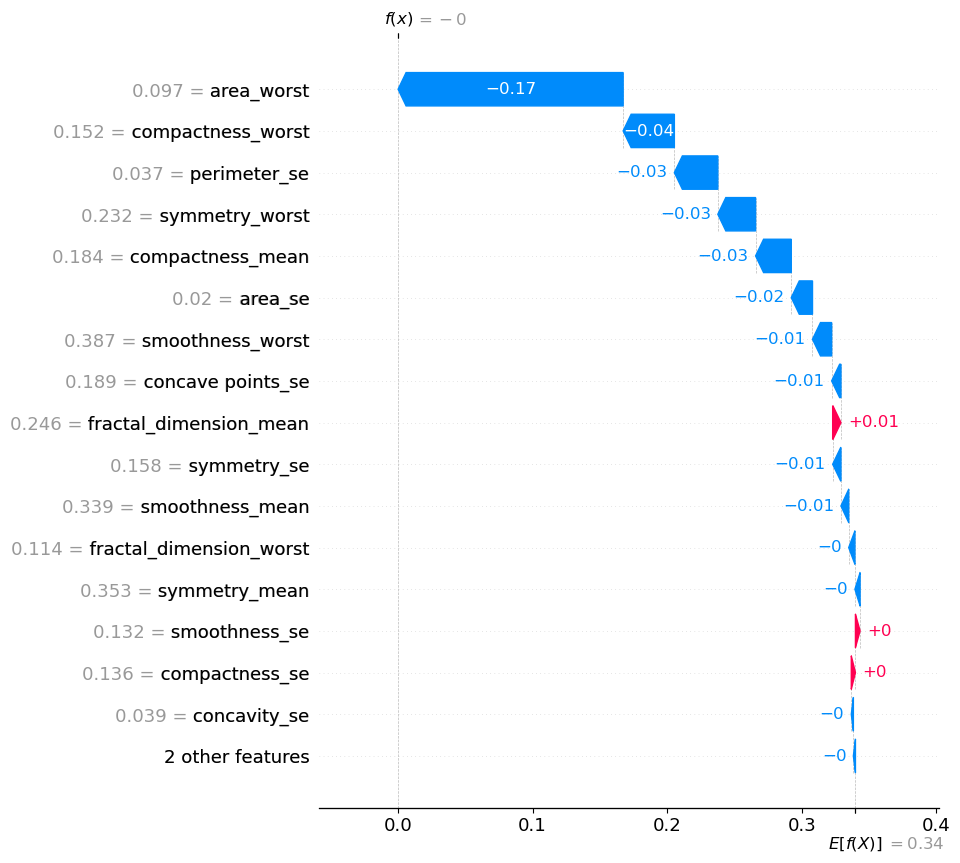

In [24]:
shap.plots.waterfall(shap_values[5], max_display=17)